In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math
from operator import itemgetter

In [2]:
def user_input():
    points = []
    print("Введите точки для задания многоугольника:")
    x, y = map(int, input().split())
    points.append([x,y])
    flag = True
    while (flag):
        x, y = map(int, input().split())
        points.append([x,y])
        if (points[0][0] == x and points[0][1] == y):
            flag = False       
    return points

In [3]:
def get_all_edges(points):
    all_edges = []
    p = points[:-1]

    y_min, y_max, x_val, x_min, x_max, slope = 0, 0, 0, 0, 0, 0
    # наклон 1/m

    for i in range(0,len(points)-1):
        if (points[i][1] < points[i+1][1]):
            y_min = points[i][1]
            x_val = points[i][0]
            y_max = points[i+1][1]
        else:
            y_min = points[i+1][1]
            x_val = points[i+1][0]
            y_max = points[i][1]
        x_min = min(points[i][0], points[i+1][0])
        x_max = max(points[i][0], points[i+1][0])
        if ((y_max - y_min) == 0):
            slope = float("inf") 
        else:
            slope = (points[i+1][0] - points[i][0])/(points[i+1][1] - points[i][1])
            #slope = (x_max - x_min)/(y_max - y_min)
        all_edges.append([y_min, y_max, x_val, slope])

    return all_edges

In [4]:
def set_global_tab(all_edges):    
    global_tab = []

    for i in range(0, len(all_edges)):
        if(all_edges[i][3] != float("inf")):
            if(global_tab == False):
                global_tab.append(all_edges[i])
                #index = 0
            else:
                global_tab.append(all_edges[i])

    global_tab.sort(key = itemgetter(0,1,2))
    return global_tab

In [5]:
def set_active_tab(global_tab):    
    #устанавливаем сканирующую прямую
    scan_line = global_tab[0][0]

    #m = global_tab.copy()
    #print(m)

    active = []
    temp = []
    i = 0

    while(i < len(global_tab)):
        if(global_tab[i][0] == scan_line):
            temp = global_tab.pop(i)
            active.append(temp[1:4])
            i -= 1
        i +=1
    return global_tab, scan_line, active

In [15]:
def filling_polygon(active, global_tab, scan_line):    
    x_points = []
    y_points = []

    while(active):
        mass_x = []
        # шаг 1
        #прорисовка и сортировка
        for i in range(0, len(active)-1):
            mass_x = [k for k in range (int(active[i][1]),int(active[i+1][1]+1))]
            if(i%2 == 0):
                for j in range(0, len(mass_x)):
                    x_points.append(mass_x[j])
                    y_points.append(scan_line)

        # шаг 2    
        scan_line += 1


        # шаг 3    
        #очистка актива
        h = 0
        while(h < len(active)):
            if(active[h][0] == scan_line):
                active.pop(h)
                h -= 1
            h += 1


        # шаг 4    
        for i in range(0, len(active)):
            active[i][1] += active[i][2]



        # шаг 5    
        #добавление из глобальнового в актив
        temp = []
        i = 0

        while(i < len(global_tab)):
            if(global_tab[i][0] == scan_line):
                temp = global_tab.pop(i)
                active.append(temp[1:4])
                i -= 1
            i +=1


        # шаг 6        
        active.sort(key = itemgetter(1))

    return x_points, y_points

Введите точки для задания многоугольника:
10 10
10 16
16 20
28 10
28 16
22 10
10 10


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


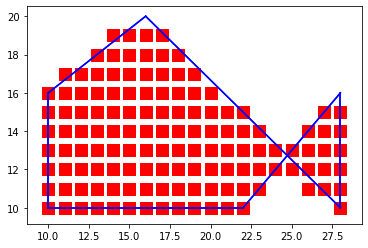

In [7]:
points = user_input()

all_edges = get_all_edges(points)

global_tab = set_global_tab(all_edges)

temp = set_active_tab(global_tab)
global_tab = temp[0]
scan_line = temp[1]
active = temp[2]

temp = filling_polygon(active, global_tab, scan_line)
x_points = temp[0]
y_points = temp[1]


fig, ax = plt.subplots()

def init():
    for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 150, marker = 's')
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
anim.save('заливка многоугольника.gif', writer='PillowWriter', fps=10)    

Введите точки для задания многоугольника:
1 1
1 6
9 14
3 14
9 8
5 4
11 4
11 10
14 10
14 1
1 1


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


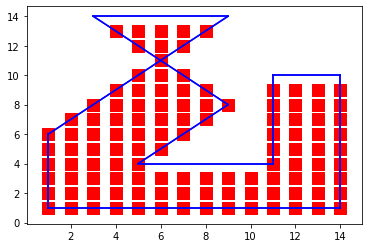

In [8]:
points = user_input()

all_edges = get_all_edges(points)

global_tab = set_global_tab(all_edges)

temp = set_active_tab(global_tab)
global_tab = temp[0]
scan_line = temp[1]
active = temp[2]

temp = filling_polygon(active, global_tab, scan_line)
x_points = temp[0]
y_points = temp[1]


fig, ax = plt.subplots()

def init():
    for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 150, marker = 's')
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
anim.save('заливка многоугольника2.gif', writer='PillowWriter', fps=10)    

Введите точки для задания многоугольника:
15 23
-9 6
0 5
-4 1
6 -7
1 1
8 15
-6 -6
15 -6
15 23


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


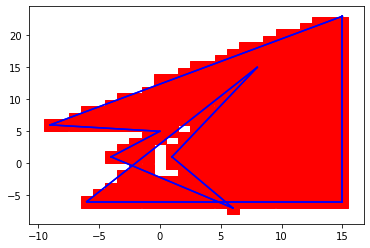

In [9]:
points = user_input()

all_edges = get_all_edges(points)

global_tab = set_global_tab(all_edges)

temp = set_active_tab(global_tab)
global_tab = temp[0]
scan_line = temp[1]
active = temp[2]

temp = filling_polygon(active, global_tab, scan_line)
x_points = temp[0]
y_points = temp[1]


fig, ax = plt.subplots()

def init():
    for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 150, marker = 's')
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
anim.save('заливка многоугольника3.gif', writer='PillowWriter', fps=10)    

Введите точки для задания многоугольника:
-8 -8
6 -8
6 15
1 4
-8 15
-8 -8


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


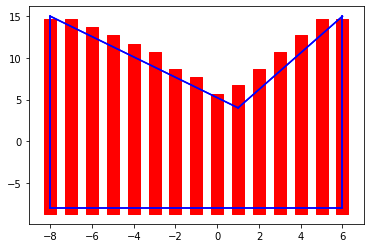

In [10]:
points = user_input()

all_edges = get_all_edges(points)

global_tab = set_global_tab(all_edges)

temp = set_active_tab(global_tab)
global_tab = temp[0]
scan_line = temp[1]
active = temp[2]

temp = filling_polygon(active, global_tab, scan_line)
x_points = temp[0]
y_points = temp[1]


fig, ax = plt.subplots()

def init():
    for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 150, marker = 's')
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
anim.save('заливка многоугольника4.gif', writer='PillowWriter', fps=10)    

Введите точки для задания многоугольника:
1 1
1 18
14 1
14 18
1 1


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


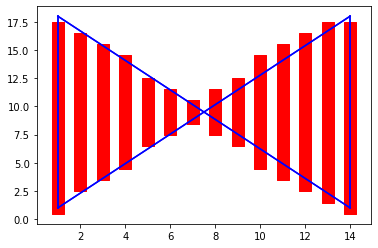

In [16]:
points = user_input()

all_edges = get_all_edges(points)

global_tab = set_global_tab(all_edges)

temp = set_active_tab(global_tab)
global_tab = temp[0]
scan_line = temp[1]
active = temp[2]

temp = filling_polygon(active, global_tab, scan_line)
x_points = temp[0]
y_points = temp[1]


fig, ax = plt.subplots()

def init():
    for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

def animate(i):
    line = ax.scatter([x_points[i]],[y_points[i]], c = 'r', s = 150, marker = 's')
    return line

anim = animation.FuncAnimation(fig, animate, frames=len(x_points), init_func=init, interval=10, repeat=False)
anim.save('заливка многоугольника5.gif', writer='PillowWriter', fps=10)    